In [17]:
import bart
import cfl
import matplotlib.pyplot as plt
import numpy as np
import pdb

In [24]:
# simulate noiseless phantom data
nkyz = 256
nc = 8
ksp_ful_nonoise = bart.bart(1, 'phantom -x {} -k -s {}'.format(nkyz, nc))
ksp_ful_nonoise.shape

(256, 256, 1, 8)

In [48]:
# add noise
noi_var = 1000
ksp_ful = bart.bart(1, 'noise -n {}'.format(noi_var), ksp_ful_nonoise)
ksp_ful.shape

(256, 256, 1, 8)

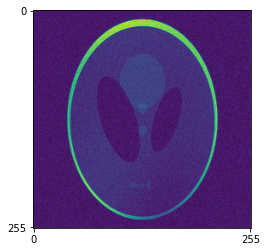

In [53]:
# root-sum-of-squares reconstruction from fully-sampled data
im_ful_coil = bart.bart(1, 'fft -i -u $(bart bitmask 0 1 2)', ksp_ful)
im_ful_rss = bart.bart(1, 'rss $(bart bitmask 3)', im_ful_coil)

_, ax = plt.subplots()
ax.set_xticks([0, nkyz-1])
ax.set_yticks([0, nkyz-1])
ax.imshow(abs(im_ful_rss))

In [ ]:
# construct poisson-disk undersampling mask